In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

torch.manual_seed(20)

data = pd.read_csv('datacollection_xpoi_xstress_exten.csv')
X = data.iloc[:, 1:4].values  # input parameters
Y = data.iloc[:, 4:34].values  # output mechanical properties
Z = data.iloc[:, 34:64].values
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
X_scaled = torch.tensor(X_scaled, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)
Z = torch.tensor(Z, dtype=torch.float32)
class StructureDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

dataset_poi = StructureDataset(X_scaled, Y)
test_size_poi = int(0.065 * len(dataset_poi))
train_size_poi = len(dataset_poi) - test_size_poi
train_dataset_poi, test_dataset_poi = random_split(dataset_poi, [train_size_poi, test_size_poi])


# Neural network architecture
class FCNN_poi(nn.Module):
    def __init__(self):
        super(FCNN_poi, self).__init__()
        self.fc1 = nn.Linear(3, 50)  
        self.fc2 = nn.Linear(50, 100)  
        self.fc3 = nn.Linear(100, 125)  
        self.fc4 = nn.Linear(125, 75)   
        self.fc5 = nn.Linear(75, 30)   
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))  
        x = torch.relu(self.fc2(x))  
        x = torch.relu(self.fc3(x))  
        x = torch.relu(self.fc4(x))  
        x = self.fc5(x) 
        return x

def train_model_poi(train_data, model, criterion, optimizer, epochs=1000):
    model.train()
    train_loader = DataLoader(train_data, batch_size=6, shuffle=True)
    for epoch in range(epochs):
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

        # Early stopping condition
        if epoch > 800 and loss.item() < 2.5e-6:
            print("Early stopping triggered at epoch {} with loss {}".format(epoch + 1, loss.item()))
            break  # Stop training if condition is met

model_poi = FCNN_poi()
criterion_poi = nn.MSELoss()
optimizer_poi = optim.Adam(model_poi.parameters(), lr=0.0005)
train_model_poi(train_dataset_poi, model_poi, criterion_poi, optimizer_poi)

Epoch 1, Loss: 0.015070711262524128
Epoch 2, Loss: 0.009770742617547512
Epoch 3, Loss: 0.0024358646478503942
Epoch 4, Loss: 0.0008208903018385172
Epoch 5, Loss: 0.0010298314737156034
Epoch 6, Loss: 0.0003329009923618287
Epoch 7, Loss: 0.002804993186146021
Epoch 8, Loss: 0.0017685830825939775
Epoch 9, Loss: 0.0010482866782695055
Epoch 10, Loss: 0.0012630351120606065
Epoch 11, Loss: 0.0007003078935667872
Epoch 12, Loss: 0.0007823925698176026
Epoch 13, Loss: 0.0009154315921477973
Epoch 14, Loss: 0.0010026951786130667
Epoch 15, Loss: 0.000622311607003212
Epoch 16, Loss: 0.001065577962435782
Epoch 17, Loss: 0.0002409048320259899
Epoch 18, Loss: 0.0010874776635318995
Epoch 19, Loss: 0.0006322933477349579
Epoch 20, Loss: 0.0006579827168025076
Epoch 21, Loss: 0.001143737928941846
Epoch 22, Loss: 0.00016672901983838528
Epoch 23, Loss: 0.0006906457711011171
Epoch 24, Loss: 0.0003429389907978475
Epoch 25, Loss: 0.0004895122838206589
Epoch 26, Loss: 0.00010871571430470794
Epoch 27, Loss: 0.0003556

In [2]:
torch.manual_seed(580)
dataset_stf = StructureDataset(X_scaled, Z)
test_size_stf = int(0.065 * len(dataset_stf))
train_size_stf = len(dataset_stf) - test_size_stf
train_dataset_stf, test_dataset_stf = random_split(dataset_stf, [train_size_stf, test_size_stf])
# Neural network architecture
class FCNN_stf(nn.Module):
    def __init__(self):
        super(FCNN_stf, self).__init__()
        self.fc1 = nn.Linear(3, 50)  
        self.fc2 = nn.Linear(50, 100)  
        self.fc3 = nn.Linear(100, 125)  
        self.fc4 = nn.Linear(125, 75)   
        self.fc5 = nn.Linear(75, 30)   
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))  
        x = torch.relu(self.fc2(x))  
        x = torch.relu(self.fc3(x))  
        x = torch.relu(self.fc4(x))  
        x = self.fc5(x) 
        return x

def train_model_stf(train_data, model, criterion, optimizer, epochs=1000):
    model.train()
    train_loader = DataLoader(train_data, batch_size=6, shuffle=True)
    for epoch in range(epochs):
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

        # Early stopping condition
        if epoch > 500 and loss.item() < 1.8e-2:
            print("Early stopping triggered at epoch {} with loss {}".format(epoch + 1, loss.item()))
            break  # Stop training if condition is met

model_stf = FCNN_stf()
criterion_stf = nn.MSELoss()
optimizer_stf = optim.Adam(model_stf.parameters(), lr=0.0005)
train_model_stf(train_dataset_stf, model_stf, criterion_stf, optimizer_stf)

Epoch 1, Loss: 424.6724853515625
Epoch 2, Loss: 158.634033203125
Epoch 3, Loss: 24.130231857299805
Epoch 4, Loss: 24.057109832763672
Epoch 5, Loss: 18.4544734954834
Epoch 6, Loss: 8.365524291992188
Epoch 7, Loss: 13.948455810546875
Epoch 8, Loss: 44.83620071411133
Epoch 9, Loss: 91.16950988769531
Epoch 10, Loss: 47.645687103271484
Epoch 11, Loss: 264.2681579589844
Epoch 12, Loss: 4.024441719055176
Epoch 13, Loss: 9.922395706176758
Epoch 14, Loss: 6.329652309417725
Epoch 15, Loss: 59.94858169555664
Epoch 16, Loss: 4.035296440124512
Epoch 17, Loss: 17.402606964111328
Epoch 18, Loss: 5.287262439727783
Epoch 19, Loss: 21.859216690063477
Epoch 20, Loss: 3.408912420272827
Epoch 21, Loss: 11.701821327209473
Epoch 22, Loss: 2.616050958633423
Epoch 23, Loss: 9.315938949584961
Epoch 24, Loss: 4.0863213539123535
Epoch 25, Loss: 2.922379732131958
Epoch 26, Loss: 1.193758249282837
Epoch 27, Loss: 9.014307975769043
Epoch 28, Loss: 57.27097702026367
Epoch 29, Loss: 3.538468360900879
Epoch 30, Loss: 1

R2 Score: 0.999029278755188


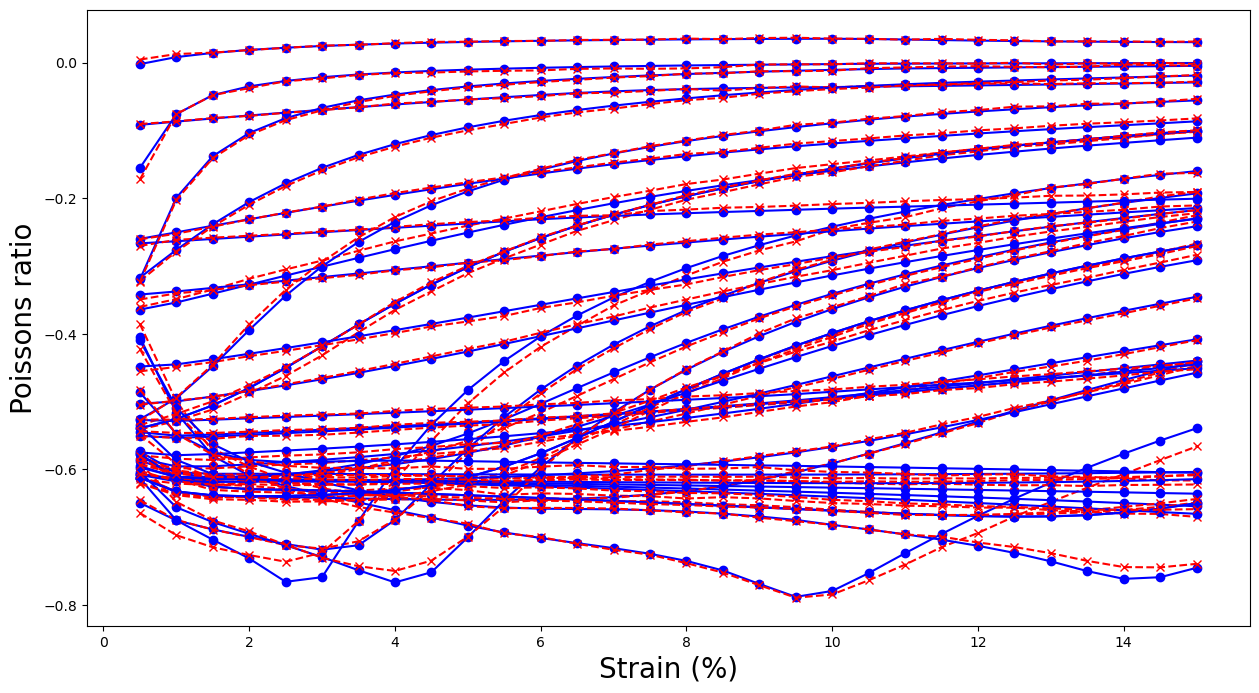

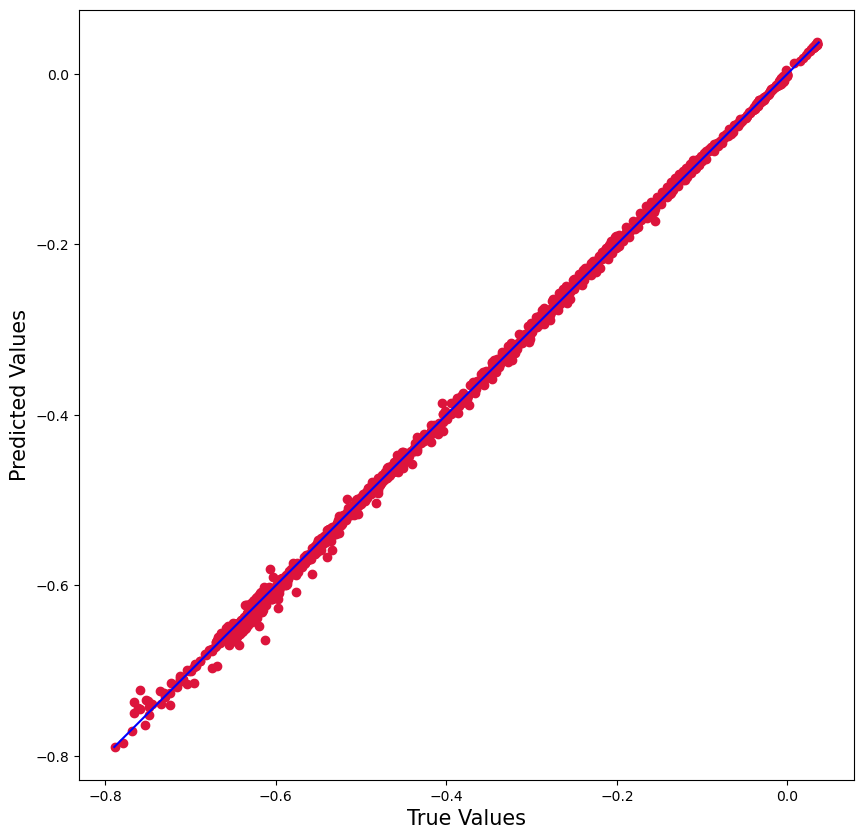

In [3]:
def evaluate_model_poi(test_data, model):
    test_loader = DataLoader(test_data, batch_size=1, shuffle=False)
    model.eval()
    all_predictions = []
    all_true_values = []
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            all_predictions.append(outputs.numpy().flatten())
            all_true_values.append(targets.numpy().flatten())
            
    predictions_i = np.array(all_predictions)
    true_values_i = np.array(all_true_values)
    
    # Compute R2 score
    r2 = r2_score(true_values_i, predictions_i)
    print("R2 Score:", r2)
    
    # Plotting true values vs. predicted values
    plt.figure(figsize=(15, 8))
    num_groups = len(all_predictions)  # Number of prediction sets
    for i in range(num_groups):
        x_axis = np.arange(0.5, 15.5, 0.5)
        true_values = all_true_values[i]
        predictions = all_predictions[i]
        
        # Plot each group's true and predicted values
        plt.plot(x_axis, true_values, label=f'True Values Group {i+1}', color='blue', marker='o')
        plt.plot(x_axis, predictions, label=f'Predicted Values Group {i+1}', color='red', linestyle='--', marker='x')

    #plt.title('Comparison of True and Predicted Values')
    plt.xlabel('Strain (%)', fontsize=20)
    plt.ylabel('Poissons ratio', fontsize=20)
    plt.show()
    
    plt.figure(figsize=(10, 10))
    plt.scatter(true_values_i, predictions_i, c='crimson')

    p1 = max(np.max(predictions_i), np.max(true_values_i))
    p2 = min(np.min(predictions_i), np.min(true_values_i))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predicted Values', fontsize=15)
    plt.axis('equal')
    plt.show()
evaluate_model_poi(test_dataset_poi, model_poi)

R2 Score: 0.9995028972625732


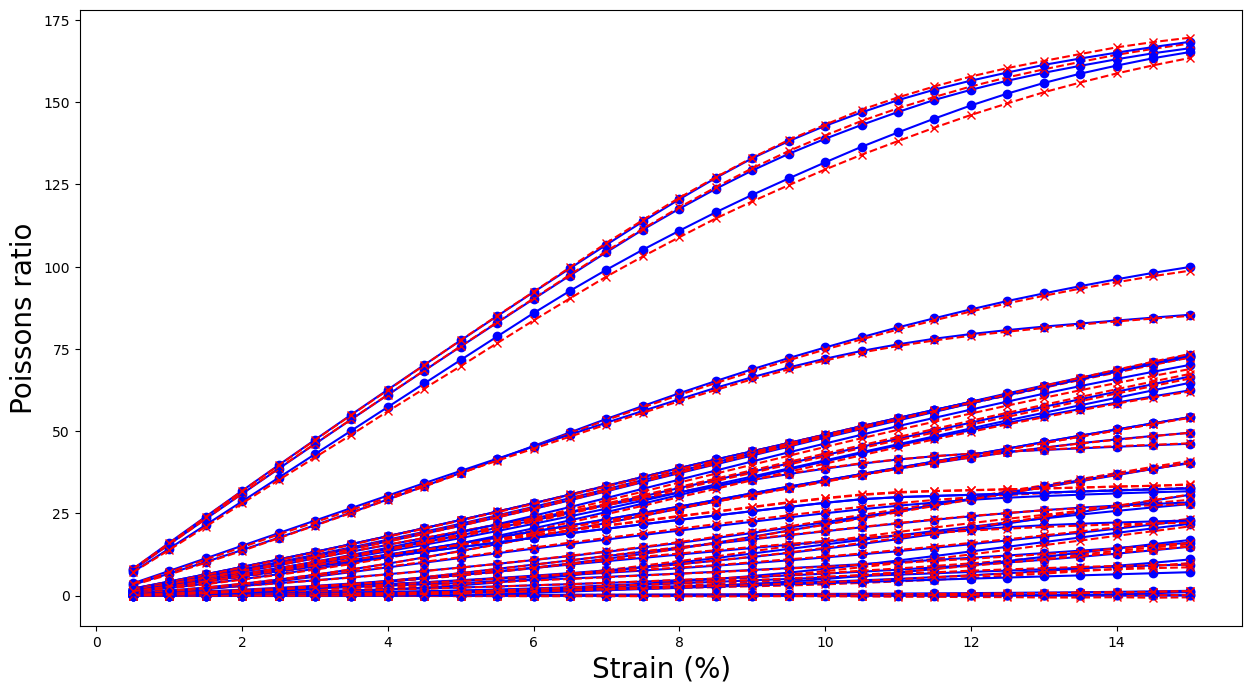

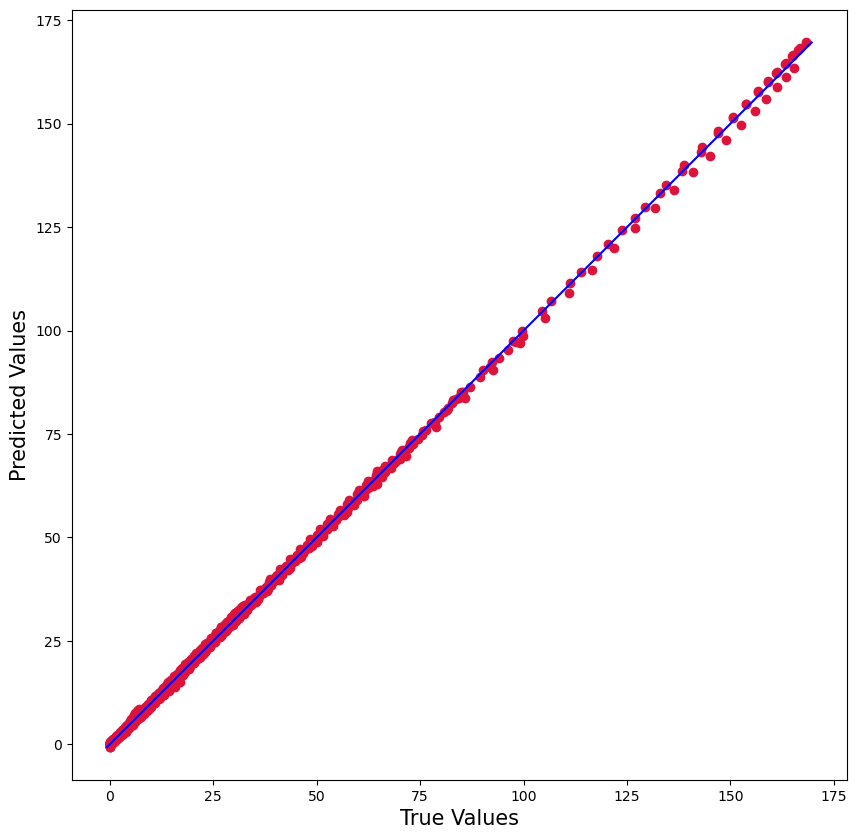

In [4]:
def evaluate_model_stf(test_data, model):
    test_loader = DataLoader(test_data, batch_size=1, shuffle=False)
    model.eval()
    all_predictions = []
    all_true_values = []
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            all_predictions.append(outputs.numpy().flatten())
            all_true_values.append(targets.numpy().flatten())
            
    predictions_i = np.array(all_predictions)
    true_values_i = np.array(all_true_values)
    
    # Compute R2 score
    r2 = r2_score(true_values_i, predictions_i)
    print("R2 Score:", r2)
    
    # Plotting true values vs. predicted values
    plt.figure(figsize=(15, 8))
    num_groups = len(all_predictions)  # Number of prediction sets
    for i in range(num_groups):
        x_axis = np.arange(0.5, 15.5, 0.5)
        true_values = all_true_values[i]
        predictions = all_predictions[i]
        
        # Plot each group's true and predicted values
        plt.plot(x_axis, true_values, label=f'True Values Group {i+1}', color='blue', marker='o')
        plt.plot(x_axis, predictions, label=f'Predicted Values Group {i+1}', color='red', linestyle='--', marker='x')

    #plt.title('Comparison of True and Predicted Values')
    plt.xlabel('Strain (%)', fontsize=20)
    plt.ylabel('Poissons ratio', fontsize=20)
    plt.show()
    
    plt.figure(figsize=(10, 10))
    plt.scatter(true_values_i, predictions_i, c='crimson')

    p1 = max(np.max(predictions_i), np.max(true_values_i))
    p2 = min(np.min(predictions_i), np.min(true_values_i))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predicted Values', fontsize=15)
    plt.axis('equal')
    plt.show()
evaluate_model_stf(test_dataset_stf, model_stf)

In [36]:
torch.manual_seed(50)
class Scaler(nn.Module):
    def __init__(self, mean, std):
        super(Scaler, self).__init__()
        self.mean = nn.Parameter(torch.tensor(mean, dtype=torch.float32), requires_grad=False)
        self.std = nn.Parameter(torch.tensor(std, dtype=torch.float32), requires_grad=False)

    def forward(self, x):
        return (x - self.mean) / (self.std + 1e-6)


data_inv_train = pd.read_csv('datacollection_xpoi_xstress_cycle.csv')

X_inv = data_inv_train.iloc[:, 1:4].values  # input parameters
Y_inv = data_inv_train.iloc[:, 4:34].values  # output mechanical properties
Z_inv = data_inv_train.iloc[:, 34:64].values
scaler_Y = StandardScaler()
scaler_Z = StandardScaler()
Y_inv = scaler_Y.fit_transform(Y_inv)
Z_inv = scaler_Z.fit_transform(Z_inv)
X_inv_scaled = scaler_X.transform(X_inv)
X_inv_scaled = torch.tensor(X_inv_scaled, dtype=torch.float32)
Y_inv = torch.tensor(Y_inv, dtype=torch.float32)
Z_inv = torch.tensor(Z_inv, dtype=torch.float32)
dataset_inverse_poi = StructureDataset(Y_inv, X_inv_scaled)
dataset_inverse_stf = StructureDataset(Z_inv, X_inv_scaled)
train_dataset_inverse_poi = dataset_inverse_poi
train_dataset_inverse_stf = dataset_inverse_stf
scaler_y = Scaler(scaler_Y.mean_, scaler_Y.scale_)
scaler_z = Scaler(scaler_Z.mean_, scaler_Z.scale_)

def variance_loss(values):
    # values should be a tensor containing the three values
    values = torch.stack(values, dim=0)
    mean_value = torch.mean(values, dim=0)
    variance = torch.mean((values - mean_value) ** 2, dim=0)
    return 1/(variance+1e-6)
    
class CycleConsistencyLoss(nn.Module):
    def __init__(self, forward_model_poi, forward_model_stf, scaler_y, scaler_z, alpha=0.0, beta=0.0, delta=0.0):
        super(CycleConsistencyLoss, self).__init__()
        self.forward_model_poi = forward_model_poi
        self.forward_model_stf = forward_model_stf
        self.scaler_y = scaler_y
        self.scaler_z = scaler_z
        self.alpha = alpha
        self.beta = beta
        self.delta = delta

    def forward(self, original_props_poi, original_props_stf, generated_params):
        # Split generated_params into three groups
        params1, params2, params3 = generated_params[:, :3], generated_params[:, 3:6], generated_params[:, 6:9]
        # Compute predicted properties for each group
        
        predicted_poi_1 = self.scaler_y(self.forward_model_poi(params1))
        predicted_poi_2 = self.scaler_y(self.forward_model_poi(params2))
        predicted_poi_3 = self.scaler_y(self.forward_model_poi(params3))

        # Average the MSE losses across all three predictions
        loss1_poi = nn.MSELoss()(predicted_poi_1, original_props_poi)
        loss2_poi = nn.MSELoss()(predicted_poi_2, original_props_poi)
        loss3_poi = nn.MSELoss()(predicted_poi_3, original_props_poi)
        common_loss_poi = (loss1_poi + loss2_poi + loss3_poi) / 3

        predicted_stf_1 = self.scaler_z(self.forward_model_stf(params1))
        predicted_stf_2 = self.scaler_z(self.forward_model_stf(params2))
        predicted_stf_3 = self.scaler_z(self.forward_model_stf(params3))

        # Average the MSE losses across all three predictions
        loss1_stf = nn.MSELoss()(predicted_stf_1, original_props_stf)
        loss2_stf = nn.MSELoss()(predicted_stf_2, original_props_stf)
        loss3_stf = nn.MSELoss()(predicted_stf_3, original_props_stf)

        common_loss_stf = (loss1_stf + loss2_stf + loss3_stf) / 3
        
        ratio_loss = torch.mean(torch.stack([
            variance_loss([params1[:, i] / (params2[:, i] + 1e-6) for i in range(3)]),
            variance_loss([params1[:, i] / (params3[:, i] + 1e-6) for i in range(3)]),
            variance_loss([params2[:, i] / (params3[:, i] + 1e-6) for i in range(3)])
        ]))      

        total_loss = self.alpha * common_loss_poi + self.beta * common_loss_stf + self.delta * ratio_loss
        return total_loss


class FCNN_inverse(nn.Module):
    def __init__(self):
        super(FCNN_inverse, self).__init__()
        self.fc1 = nn.Linear(60, 90)  
        self.fc2 = nn.Linear(90, 125)  
        self.fc3 = nn.Linear(125, 150)
        self.fc4 = nn.Linear(150, 100)  
        self.fc5 = nn.Linear(100, 50)   
        self.fc6 = nn.Linear(50, 9)   

    def forward(self, x):
        x = torch.relu(self.fc1(x))  
        x = torch.relu(self.fc2(x))  
        x = torch.relu(self.fc3(x))  
        x = torch.relu(self.fc4(x))  
        x = torch.relu(self.fc5(x))  
        return self.fc6(x)

def train_model_inverse(train_data_poi, train_data_stf, inverse_model, forward_model_poi, forward_model_stf, scaler_y, scaler_z, optimizer, epochs=1000):
    train_loader_poi = DataLoader(train_data_poi, batch_size=6, shuffle=True)
    train_loader_stf = DataLoader(train_data_stf, batch_size=6, shuffle=True)
    cycle_loss_fn = CycleConsistencyLoss(forward_model_poi, forward_model_stf, scaler_y, scaler_z, alpha=0.6, beta=1.0, delta=1.5)
    inverse_model.train()
    forward_model_poi.eval()
    forward_model_stf.eval()

    for epoch in range(epochs):
        total_loss = 0
        for (mechanical_props_poi, true_params_1), (mechanical_props_stf, true_params_2) in zip(train_loader_poi, train_loader_stf):
            optimizer.zero_grad()
            mechanical_props_poi = mechanical_props_poi.requires_grad_()
            mechanical_props_stf = mechanical_props_stf.requires_grad_()
            generated_params = inverse_model(torch.cat([mechanical_props_poi, mechanical_props_stf], dim=1))
            loss = cycle_loss_fn(mechanical_props_poi, mechanical_props_stf, generated_params)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader_poi)
        print(f'Epoch {epoch+1}, Cycle Loss: {avg_loss}')
        if epoch > 900 and avg_loss < 0.085:
            print("Early stopping triggered at epoch {} with loss {}".format(epoch + 1, avg_loss))
            break

inverse_model = FCNN_inverse()
optimizer_inverse = optim.Adam(inverse_model.parameters(), lr=0.0005)  

train_model_inverse(train_dataset_inverse_poi, train_dataset_inverse_stf, inverse_model, model_poi, model_stf, scaler_y, scaler_z, optimizer_inverse)

Epoch 1, Cycle Loss: 2.4270884513854982
Epoch 2, Cycle Loss: 1.422417242527008
Epoch 3, Cycle Loss: 1.103231583237648
Epoch 4, Cycle Loss: 1.0850227057933808
Epoch 5, Cycle Loss: 1.0333032619953155
Epoch 6, Cycle Loss: 0.9408630871772766
Epoch 7, Cycle Loss: 0.8303239190578461
Epoch 8, Cycle Loss: 0.643382653594017
Epoch 9, Cycle Loss: 0.8837808346748353
Epoch 10, Cycle Loss: 0.7701091861724854
Epoch 11, Cycle Loss: 0.6121353799104691
Epoch 12, Cycle Loss: 0.5863742423057556
Epoch 13, Cycle Loss: 0.6735512316226959
Epoch 14, Cycle Loss: 0.32443017899990084
Epoch 15, Cycle Loss: 0.7447624367475509
Epoch 16, Cycle Loss: 1.0444701147079467
Epoch 17, Cycle Loss: 0.9258961912989616
Epoch 18, Cycle Loss: 0.8331599110364913
Epoch 19, Cycle Loss: 0.7006887727975846
Epoch 20, Cycle Loss: 0.6861806392669678
Epoch 21, Cycle Loss: 0.5012309378385544
Epoch 22, Cycle Loss: 0.41328240394592286
Epoch 23, Cycle Loss: 0.3973036730289459
Epoch 24, Cycle Loss: 0.35890370726585386
Epoch 25, Cycle Loss: 0.4

Average R2 Score on Test Set: 0.9860


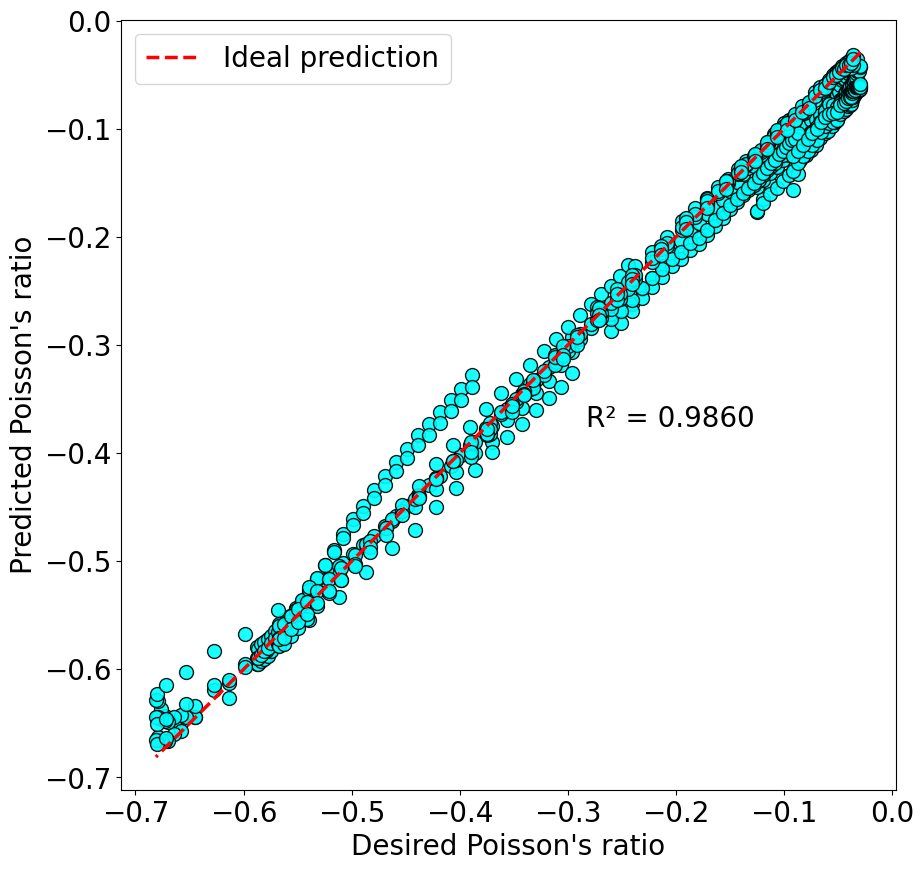

0.005045072 0.027156556 0.021947289
relative for sample is: 0.9533517 5.925512 4.8250656 %


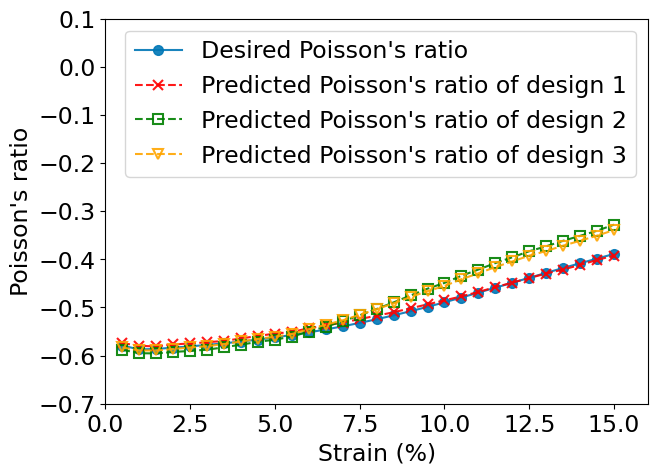

(0.9860364198684692,
 array([[60.49506   ,  7.6355953 ,  2.8719234 ],
        [21.002176  ,  3.217624  ,  1.2327265 ],
        [17.741074  ,  2.7224886 ,  0.9944466 ],
        [52.411777  ,  6.0403466 ,  2.8170094 ],
        [21.17033   ,  2.7322297 ,  1.3283087 ],
        [17.927996  ,  2.3533728 ,  1.114174  ],
        [27.896147  ,  2.3021767 ,  2.7011912 ],
        [21.097368  ,  1.3645811 ,  1.7599199 ],
        [18.066175  ,  1.2608186 ,  1.5513076 ],
        [93.0703    ,  3.3857152 ,  6.9595184 ],
        [43.831654  ,  1.3905743 ,  3.2588644 ],
        [18.09367   ,  0.74452   ,  1.439754  ],
        [59.572838  ,  8.600525  ,  3.1673002 ],
        [21.583841  ,  3.8857427 ,  1.422917  ],
        [17.536266  ,  3.193868  ,  1.133202  ],
        [35.385605  ,  2.3461266 ,  2.5717967 ],
        [22.418068  ,  1.348085  ,  1.5481932 ],
        [18.140406  ,  1.1684061 ,  1.3053232 ],
        [48.989883  ,  3.714948  ,  2.23137   ],
        [20.334143  ,  1.4228888 ,  0.9222605 ],

In [37]:
data_inv_test = pd.read_csv('datacollection_xpoi_xstress_cycle_test.csv')
X_inv_test = data_inv_test.iloc[:, 1:4].values  
Y_inv_test = data_inv_test.iloc[:, 4:34].values 
Z_inv_test = data_inv_test.iloc[:, 34:64].values 
Y_inv_test = scaler_Y.transform(Y_inv_test)
Z_inv_test = scaler_Z.transform(Z_inv_test)
X_inv_test_scaled = scaler_X.transform(X_inv_test)
X_inv_test_scaled = torch.tensor(X_inv_test_scaled, dtype=torch.float32)
Y_inv_test = torch.tensor(Y_inv_test, dtype=torch.float32)
Z_inv_test = torch.tensor(Z_inv_test, dtype=torch.float32)

test_dataset_inverse_poi = StructureDataset(Y_inv_test, X_inv_test_scaled)
test_dataset_inverse_stf = StructureDataset(Z_inv_test, X_inv_test_scaled)

def evaluate_model_r2(test_data_poi, test_data_stf, inverse_model, forward_model, scaler_X, scaler_Y):
    inverse_model.eval() 
    forward_model.eval()  
    test_loader_poi = DataLoader(test_data_poi, batch_size=1, shuffle=False)
    test_loader_stf = DataLoader(test_data_stf, batch_size=1, shuffle=False)
    
    all_targets = []
    all_predictions = []
    all_predicted_params = []

    with torch.no_grad():
        for (mechanical_props_poi, _), (mechanical_props_stf, _) in zip(test_loader_poi, test_loader_stf):
            predicted_design_params = inverse_model(torch.cat([mechanical_props_poi, mechanical_props_stf], dim=1))
            # Splitting the predicted parameters into three groups
            params1, params2, params3 = predicted_design_params[:, :3], predicted_design_params[:, 3:6], predicted_design_params[:, 6:9]
            for group in [params1, params2, params3]:
                predicted_mechanical_props_poi = forward_model(group)
                all_predictions.extend(predicted_mechanical_props_poi.numpy())
                all_targets.extend(mechanical_props_poi.numpy())
                all_predicted_params.extend(group.numpy())          
            
    all_predictions = np.array(all_predictions)
    all_targets = np.array(all_targets)
    all_predicted_params = np.array(all_predicted_params)
    all_predicted_params_original = scaler_X.inverse_transform(all_predicted_params)

    all_targets = scaler_Y.inverse_transform(all_targets)
    r2_scores = r2_score(all_targets, all_predictions)
        
    print(f'Average R2 Score on Test Set: {r2_scores:.4f}')
##########
    plt.figure(figsize=(10, 10))
    for i in range(0, len(all_targets), 3):
        plt.scatter(all_targets[i:i+3], all_predictions[i:i+3], color='cyan', edgecolors='black', alpha=0.9, s=100)  

    p1 = max(np.max(all_predictions), np.max(all_targets))
    p2 = min(np.min(all_predictions), np.min(all_targets))
    plt.plot([p1, p2], [p1, p2], 'r--', label='Ideal prediction', linewidth=2.5)  

    # Annotations and style
    plt.xlabel('Desired Poisson\'s ratio', fontsize=20)
    plt.ylabel('Predicted Poisson\'s ratio', fontsize=20)
    plt.axis('equal')
    plt.grid(False)
    plt.legend(fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.text(0.6, 0.5, f'R² = {r2_scores:.4f}', transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')
    plt.savefig('Poi_inverse_diver_R2.png', dpi=450, bbox_inches='tight')
    plt.show()
##########
#    plt.figure(figsize=(10, 10))
#    for i in range(0, len(all_targets), 3):
#        plt.scatter(all_targets[i:i+3], all_predictions[i:i+3], c='crimson')
#
#    p1 = max(np.max(all_predictions), np.max(all_targets))
#    p2 = min(np.min(all_predictions), np.min(all_targets))
#    plt.plot([p1, p2], [p1, p2], 'b-')
#    plt.xlabel('True Values', fontsize=15)
#    plt.ylabel('Predicted Values', fontsize=15)
#    plt.axis('equal')
#    plt.show()

    all_targets = all_targets.flatten()  # Flatten in case they are not 1D
    all_predictions = all_predictions.flatten()   
    group_size = 30
    num_groups = len(all_targets) // group_size
#    plt.figure(figsize=(15, 8))
#    for i in range(num_groups):
#        start_idx = i * group_size
#        end_idx = start_idx + group_size
#        counts = np.arange(1, group_size + 1)
#
#        plt.plot(counts/2, all_targets[start_idx:end_idx], label=f'True Values Group {i+1}', marker='o', linestyle='-', color='blue')
#        plt.plot(counts/2, all_predictions[start_idx:end_idx], label=f'Predicted Values Group {i+1}', marker='x', linestyle='--', color='red')
#
#    plt.xlabel('Strain(%)', fontsize=20)
#    plt.ylabel('Poissons Ratio', fontsize=20)
#    #plt.title('Grouped Values vs. Counts')
#    plt.tick_params(axis='both', which='major', labelsize=16)
#
#    plt.tight_layout()
#    plt.savefig('four_poi.png')
#    plt.show()
    plt.figure(figsize=(7, 5))
    i = 6
    start_idx = i * group_size
    target_start = start_idx
    end_idx = start_idx + group_size
    target_end = end_idx
    counts = np.arange(1, group_size + 1)
    plt.plot(counts/2, all_targets[start_idx:end_idx], label=f'Desired Poisson\'s ratio', color='#0077b6', marker='o', linewidth=1.5, markersize=7, alpha=0.9)
    plt.plot(counts/2, all_predictions[start_idx:end_idx], label=f'Predicted Poisson\'s ratio of design 1', color='red', linestyle='--', marker='x', linewidth=1.5, markersize=7, markerfacecolor='none', alpha=0.9, markeredgewidth=1.5)
    mae_DM_1 = mean_absolute_error(all_targets[target_start:target_end], all_predictions[start_idx:end_idx])
    absolute_errors = np.abs(np.array(all_predictions[start_idx:end_idx]) - np.array(all_targets[start_idx:end_idx]))
    relative_errors = absolute_errors / (np.abs(all_targets[start_idx:end_idx])+0.00001)
    relative_errors_percentage_1 = np.mean(relative_errors * 100)
    i = 7
    start_idx = i * group_size
    end_idx = start_idx + group_size
    counts = np.arange(1, group_size + 1)
    plt.plot(counts/2, all_predictions[start_idx:end_idx], label=f'Predicted Poisson\'s ratio of design 2', color='green', linestyle='--', marker='s', linewidth=1.5, markersize=7, markerfacecolor='none', alpha=0.9, markeredgewidth=1.5)
    mae_DM_2 = mean_absolute_error(all_targets[target_start:target_end], all_predictions[start_idx:end_idx])
    absolute_errors = np.abs(np.array(all_predictions[start_idx:end_idx]) - np.array(all_targets[start_idx:end_idx]))
    relative_errors = absolute_errors / (np.abs(all_targets[start_idx:end_idx])+0.00001)
    relative_errors_percentage_2 = np.mean(relative_errors * 100)
    i = 8
    start_idx = i * group_size
    end_idx = start_idx + group_size
    counts = np.arange(1, group_size + 1)
    plt.plot(counts/2, all_predictions[start_idx:end_idx], label=f'Predicted Poisson\'s ratio of design 3', color='orange', linestyle='--', marker='v', linewidth=1.5, markersize=7, markerfacecolor='none', alpha=0.9, markeredgewidth=1.5)
    mae_DM_3 = mean_absolute_error(all_targets[target_start:target_end], all_predictions[start_idx:end_idx])
    print(mae_DM_1, mae_DM_2, mae_DM_3)
    absolute_errors = np.abs(np.array(all_predictions[start_idx:end_idx]) - np.array(all_targets[start_idx:end_idx]))
    relative_errors = absolute_errors / (np.abs(all_targets[start_idx:end_idx])+0.00001)
    relative_errors_percentage_3 = np.mean(relative_errors * 100)
    print("relative for sample is:", relative_errors_percentage_1,relative_errors_percentage_2,relative_errors_percentage_3, "%")
    plt.xlabel('Strain (%)', fontsize=17)
    plt.ylabel('Poisson\'s ratio', fontsize=17)
    plt.xlim(0, 16)
    plt.ylim(-0.7, 0.1)
    plt.legend(fontsize=17)
    plt.tick_params(axis='both', which='major', labelsize=17)
    plt.savefig('Poi_inverse_test_1_comb.png', dpi=450, bbox_inches='tight')
    plt.show()

    return r2_scores, all_predicted_params_original
    
evaluate_model_r2(test_dataset_inverse_poi, test_dataset_inverse_stf, inverse_model, model_poi, scaler_X, scaler_Y)


Average R2 Score on Test Set: 0.9939


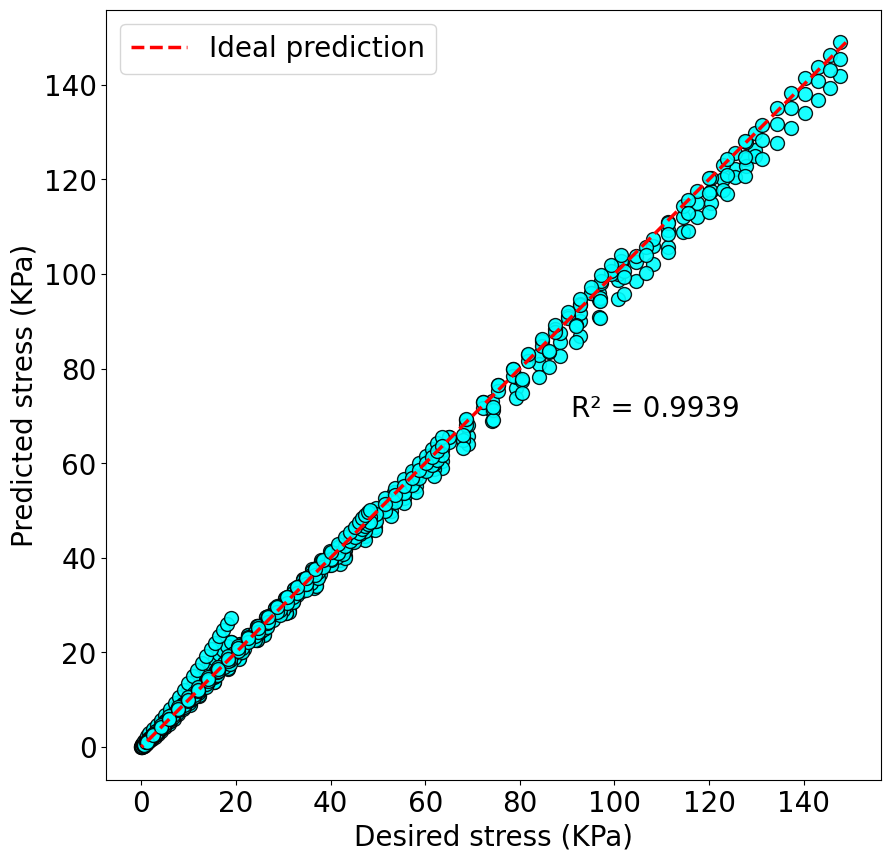

0.74865776 0.39694133 0.5979706
relative for sample is: 5.091185 8.857813 5.515102 %


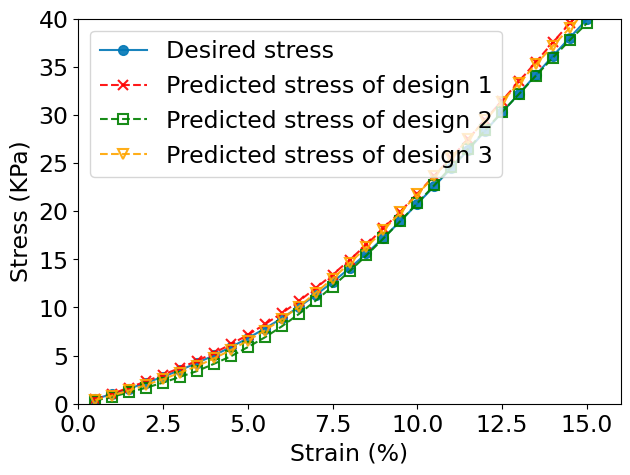

(0.9938536286354065,
 array([[60.49506   ,  7.6355953 ,  2.8719234 ],
        [21.002176  ,  3.217624  ,  1.2327265 ],
        [17.741074  ,  2.7224886 ,  0.9944466 ],
        [52.411777  ,  6.0403466 ,  2.8170094 ],
        [21.17033   ,  2.7322297 ,  1.3283087 ],
        [17.927996  ,  2.3533728 ,  1.114174  ],
        [27.896147  ,  2.3021767 ,  2.7011912 ],
        [21.097368  ,  1.3645811 ,  1.7599199 ],
        [18.066175  ,  1.2608186 ,  1.5513076 ],
        [93.0703    ,  3.3857152 ,  6.9595184 ],
        [43.831654  ,  1.3905743 ,  3.2588644 ],
        [18.09367   ,  0.74452   ,  1.439754  ],
        [59.572838  ,  8.600525  ,  3.1673002 ],
        [21.583841  ,  3.8857427 ,  1.422917  ],
        [17.536266  ,  3.193868  ,  1.133202  ],
        [35.385605  ,  2.3461266 ,  2.5717967 ],
        [22.418068  ,  1.348085  ,  1.5481932 ],
        [18.140406  ,  1.1684061 ,  1.3053232 ],
        [48.989883  ,  3.714948  ,  2.23137   ],
        [20.334143  ,  1.4228888 ,  0.9222605 ],

In [38]:
def evaluate_model_r2(test_data_poi, test_data_stf, inverse_model, forward_model, scaler_X, scaler_Z):
    inverse_model.eval() 
    forward_model.eval()  
    test_loader_poi = DataLoader(test_data_poi, batch_size=1, shuffle=False)
    test_loader_stf = DataLoader(test_data_stf, batch_size=1, shuffle=False)
    
    all_targets = []
    all_predictions = []
    all_predicted_params = []

    with torch.no_grad():
        for (mechanical_props_poi, _), (mechanical_props_stf, _) in zip(test_loader_poi, test_loader_stf):
            predicted_design_params = inverse_model(torch.cat([mechanical_props_poi, mechanical_props_stf], dim=1))
            # Splitting the predicted parameters into three groups
            params1, params2, params3 = predicted_design_params[:, :3], predicted_design_params[:, 3:6], predicted_design_params[:, 6:9]
            for group in [params1, params2, params3]:
                predicted_mechanical_props_stf = forward_model(group)
                all_predictions.extend(predicted_mechanical_props_stf.numpy())
                all_targets.extend(mechanical_props_stf.numpy())
                all_predicted_params.extend(group.numpy())          
            
    all_predictions = np.array(all_predictions)
    all_targets = np.array(all_targets)
    all_predicted_params = np.array(all_predicted_params)
    all_predicted_params_original = scaler_X.inverse_transform(all_predicted_params)

    all_targets = scaler_Z.inverse_transform(all_targets)
    
    r2_scores = r2_score(all_targets, all_predictions)
        
    print(f'Average R2 Score on Test Set: {r2_scores:.4f}')
##########
    plt.figure(figsize=(10, 10))
    for i in range(0, len(all_targets), 3):
        plt.scatter(all_targets[i:i+3], all_predictions[i:i+3], color='cyan', edgecolors='black', alpha=0.9, s=100)  

    p1 = max(np.max(all_predictions), np.max(all_targets))
    p2 = min(np.min(all_predictions), np.min(all_targets))
    plt.plot([p1, p2], [p1, p2], 'r--', label='Ideal prediction', linewidth=2.5)  

    # Annotations and style
    plt.xlabel('Desired stress (KPa)', fontsize=20)
    plt.ylabel('Predicted stress (KPa)', fontsize=20)
    plt.axis('equal')
    plt.grid(False)
    plt.legend(fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.text(0.6, 0.5, f'R² = {r2_scores:.4f}', transform=plt.gca().transAxes, fontsize=20, verticalalignment='top')
    plt.savefig('Stress_inverse_diver_R2.png', dpi=450, bbox_inches='tight')
    plt.show()
##########
#    plt.figure(figsize=(10, 10))
#    for i in range(0, len(all_targets), 3):
#        plt.scatter(all_targets[i:i+3], all_predictions[i:i+3], c='crimson')
#
#    p1 = max(np.max(all_predictions), np.max(all_targets))
#    p2 = min(np.min(all_predictions), np.min(all_targets))
#    plt.plot([p1, p2], [p1, p2], 'b-')
#    plt.xlabel('True Values', fontsize=15)
#    plt.ylabel('Predicted Values', fontsize=15)
#    plt.axis('equal')
#    plt.show()

    all_targets = all_targets.flatten()  # Flatten in case they are not 1D
    all_predictions = all_predictions.flatten()   
    group_size = 30
    num_groups = len(all_targets) // group_size
#    plt.figure(figsize=(15, 8))
#    print(num_groups)
#    for i in range(num_groups):
#        start_idx = i * group_size
#        end_idx = start_idx + group_size
#        counts = np.arange(1, group_size + 1)
#
#        plt.plot(counts/2, all_targets[start_idx:end_idx], label=f'True Values Group {i+1}', marker='o', linestyle='-', color='blue')
#        plt.plot(counts/2, all_predictions[start_idx:end_idx], label=f'Predicted Values Group {i+1}', marker='x', linestyle='--', color='red')
#
#    plt.xlabel('Strain(%)', fontsize=20)
#    plt.ylabel('Stress (KPa)', fontsize=20)
#    #plt.title('Grouped Values vs. Counts')
#    plt.tick_params(axis='both', which='major', labelsize=16)
#
#    plt.tight_layout()
#    plt.savefig('four_stress.png')
#    plt.show()
    plt.figure(figsize=(7, 5))
    i = 6
    start_idx = i * group_size
    target_start = start_idx
    end_idx = start_idx + group_size
    target_end = end_idx
    counts = np.arange(1, group_size + 1)
    plt.plot(counts/2, all_targets[start_idx:end_idx], label=f'Desired stress', color='#0077b6', marker='o', linewidth=1.5, markersize=7, alpha=0.9)
    plt.plot(counts/2, all_predictions[start_idx:end_idx], label=f'Predicted stress of design 1', color='red', linestyle='--', marker='x', linewidth=1.5, markersize=7, markerfacecolor='none', alpha=0.9, markeredgewidth=1.5)
    mae_DM_1 = mean_absolute_error(all_targets[target_start:target_end], all_predictions[start_idx:end_idx])
    absolute_errors = np.abs(np.array(all_predictions[start_idx:end_idx]) - np.array(all_targets[start_idx:end_idx]))
    relative_errors = absolute_errors / (np.abs(all_targets[start_idx:end_idx])+0.00001)
    relative_errors_percentage_1 = np.mean(relative_errors * 100)
    #print(all_targets[start_idx:end_idx])
    #print(all_predictions[start_idx:end_idx])
    #print(absolute_errors)
    #print(relative_errors)
    i = 7
    start_idx = i * group_size
    end_idx = start_idx + group_size
    counts = np.arange(1, group_size + 1)
    plt.plot(counts/2, all_predictions[start_idx:end_idx], label=f'Predicted stress of design 2', color='green', linestyle='--', marker='s', linewidth=1.5, markersize=7, markerfacecolor='none', alpha=0.9, markeredgewidth=1.5)
    mae_DM_2 = mean_absolute_error(all_targets[target_start:target_end], all_predictions[start_idx:end_idx])
    absolute_errors = np.abs(np.array(all_predictions[start_idx:end_idx]) - np.array(all_targets[start_idx:end_idx]))
    relative_errors = absolute_errors / (np.abs(all_targets[start_idx:end_idx])+0.00001)
    relative_errors_percentage_2 = np.mean(relative_errors * 100)
    #print(all_predictions[start_idx:end_idx])
    i = 8
    start_idx = i * group_size
    end_idx = start_idx + group_size
    counts = np.arange(1, group_size + 1)
    plt.plot(counts/2, all_predictions[start_idx:end_idx], label=f'Predicted stress of design 3', color='orange', linestyle='--', marker='v', linewidth=1.5, markersize=7, markerfacecolor='none', alpha=0.9, markeredgewidth=1.5)
    mae_DM_3 = mean_absolute_error(all_targets[target_start:target_end], all_predictions[start_idx:end_idx])
    print(mae_DM_1, mae_DM_2, mae_DM_3)
    absolute_errors = np.abs(np.array(all_predictions[start_idx:end_idx]) - np.array(all_targets[start_idx:end_idx]))
    relative_errors = absolute_errors / (np.abs(all_targets[start_idx:end_idx])+0.00001)
    relative_errors_percentage_3 = np.mean(relative_errors * 100)
    #print(all_predictions[start_idx:end_idx])
    print("relative for sample is:", relative_errors_percentage_1,relative_errors_percentage_2,relative_errors_percentage_3, "%")
    plt.xlabel('Strain (%)', fontsize=17)
    plt.ylabel('Stress (KPa)', fontsize=17)
    plt.xlim(0, 16)
    plt.ylim(0, 40)
    plt.legend(fontsize=17)
    plt.tick_params(axis='both', which='major', labelsize=17)
    plt.savefig('Stress_inverse_test_1_comb.png', dpi=450, bbox_inches='tight')
    plt.show()
    return r2_scores, all_predicted_params_original
    
evaluate_model_r2(test_dataset_inverse_poi, test_dataset_inverse_stf, inverse_model, model_stf, scaler_X, scaler_Z)